In [2]:
!pip install JPype1

In [33]:
import nltk

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
!pip install konlpy

# 1.

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
kkma.sentences('환경 변수 너무 싫어요~~ 으아아아~ 왜 안되는데~~')

['환경 변수 너무 싫어요~~', '으아 아아~ 왜 안되는데~~']

In [4]:
kkma.nouns('환경 변수 너무 싫어요~~ 으아아아~ 왜 안되는데~~')

['환경', '변수']

In [5]:
kkma.pos('환경 변수 너무 싫어요~~ 으아아아~ 왜 안되는데~~')

[('환경', 'NNG'),
 ('변수', 'NNG'),
 ('너무', 'MAG'),
 ('싫', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW'),
 ('으아', 'MAG'),
 ('아아', 'MAG'),
 ('~', 'SO'),
 ('외', 'VA'),
 ('어', 'ECS'),
 ('안되', 'VA'),
 ('는데', 'ECD'),
 ('~~', 'SW')]

# 2.

In [6]:
from konlpy.tag import Hannanum
hananum = Hannanum()

In [7]:
hananum.nouns('가위 나비 다람쥐 라면 마늘 바늘 사람 으아악 안녕하네요??')

['가위', '나비', '다람쥐', '라', '마늘', '바늘', '사람', '으아악', '안녕']

In [8]:
hananum.pos('안녕하세요 반갑습니다 안녕히 가실?')

[('안녕', 'N'),
 ('하', 'X'),
 ('세', 'E'),
 ('요', 'J'),
 ('반갑', 'P'),
 ('습니다', 'E'),
 ('안녕히', 'M'),
 ('가', 'P'),
 ('시ㄹ', 'E'),
 ('?', 'S')]

In [9]:
hananum.morphs('안녕하십니까 그렇습까 아닙까 그렇지 않다.')

['안녕', '하', '시ㅂ니까', '그렇습까', '아닙까', '그렇', '지', '않', '다', '.']

# 3.

In [10]:
from konlpy.tag import Twitter

In [11]:
tw = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
tw.nouns('가위 나비 다람쥐 라면 마늘 바늘 사람 으아악 안녕하네요??')

['가위', '나비', '다람쥐', '라면', '마늘', '바늘', '사람']

In [13]:
tw.morphs('안녕하십니까 그렇습까 아닙까 그렇지 않다')

['안녕하십니까', '그렇', '습', '까', '아닙까', '그렇지', '않다']

# 4.

In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
import numpy as np
from PIL import Image

In [18]:
text = open('archive7-8/07. alice.txt').read()
alice_mask = np.array(Image.open('archive7-8/07. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [44]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

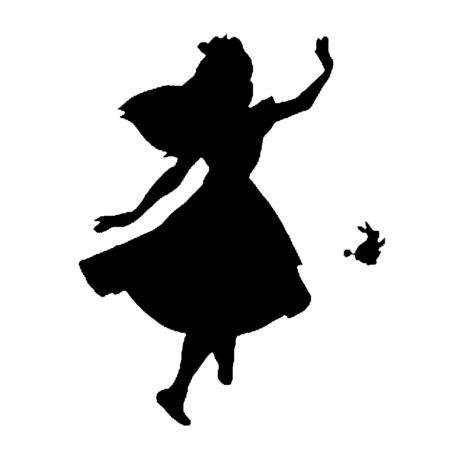

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)

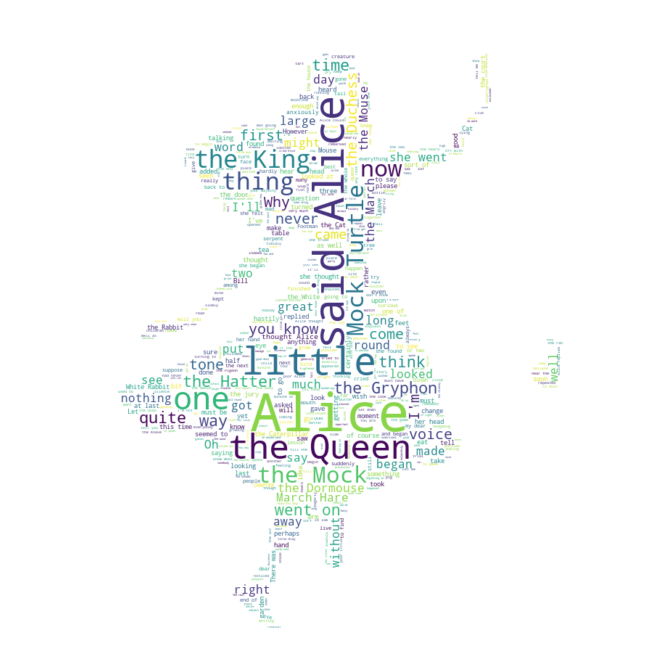

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [25]:
from konlpy.corpus import kobill

In [26]:
files_ko = kobill.fileids()

In [27]:
doc_ko = kobill.open('1809890.txt').read()

In [30]:
tokens_ko = tw.nouns(doc_ko)

In [34]:
ko = nltk.Text(tokens_ko, name='국회 의안 1809호')

In [35]:
len(ko.tokens)

735

In [36]:
len(set(ko.tokens))

250

In [37]:
ko.vocab()

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

In [38]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

In [39]:
ko = [each_word for each_word in ko if each_word not in stop_words]

In [42]:
ko = nltk.Text(ko, name='국회 의안 1809호')

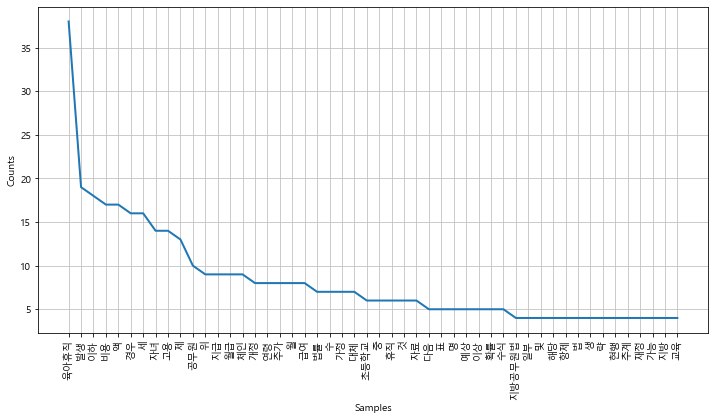

In [45]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [52]:
ko.count('고용')

14

상관분석

In [53]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


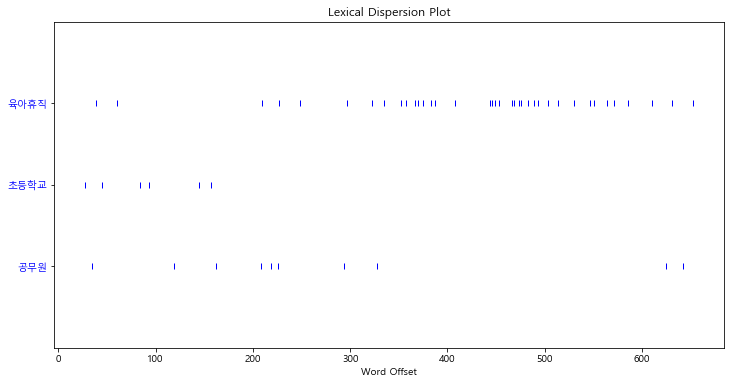

In [54]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원'])